In [112]:
__author__ = "me"
__date__ = "2015_10_13"
%pylab inline

import pandas as pd
import numpy as np
# import geopandas as gp

import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

from palettable.wesanderson import FantasticFox1_5
PARQA = os.getenv('PARQA')

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
calls = pd.read_csv(PARQA +'/parqa/311/TIMESERIES/311_timeseries.csv').set_index('parkDistrict')

In [3]:
pip = pd.read_csv(PARQA + '/parqa/311/TIMESERIES/PIP_score_timeseries.csv', index_col=0)


In [4]:
calls.head(2)

,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,363,353,374,397,564,619
B-02,339,396,282,463,566,614


In [5]:
pip = pip[pip.score_type == 'Amenities & Area Normalized Score'][['District']+ [str(x) for x in xrange(2010,2016)]]
pip = pip.rename(columns={'District':'parkDistrict'}).set_index('parkDistrict')

pip.head(2)

,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,0.809202,0.825962,0.831345,0.823218,0.854233,0.824545
B-02,0.839114,0.879936,0.895369,0.888944,0.887673,0.873778


In [6]:
def normalise_timeseries(df, label='parkDistrict', ax=1):
    '''normalise timeseries by row seeing everything 
       but label as part of it'''
    
    cols_to_norm = [x for x in df.columns if x!=label ]
    df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.mean()) / (x.std()), axis=ax)

    return df
    

In [7]:
pip_n = normalise_timeseries(pip)
calls_n = normalise_timeseries(calls)

In [8]:
calls_n.head(2)

,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,-0.708531,-0.794937,-0.613484,-0.414750,1.028234,1.503468
B-02,-0.806317,-0.365805,-1.246828,0.151989,0.948002,1.318959


In [9]:
pip_n.head(2)

,2010,2011,2012,2013,2014,2015
parkDistrict,,,,,,
B-01,-1.277902,-0.143619,0.220666,-0.329300,1.769697,-0.239543
B-02,-1.895588,0.121915,0.884665,0.567136,0.504305,-0.182434


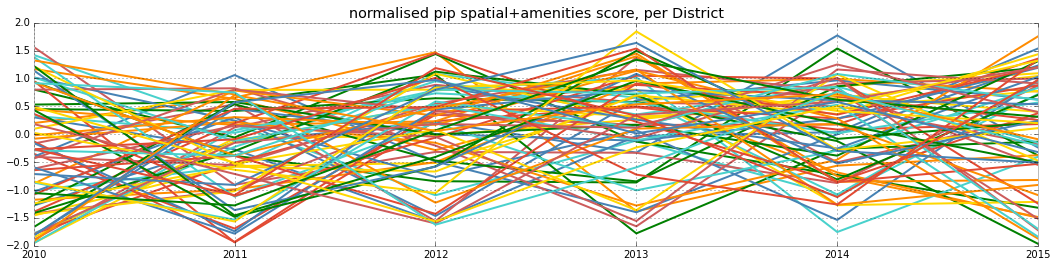

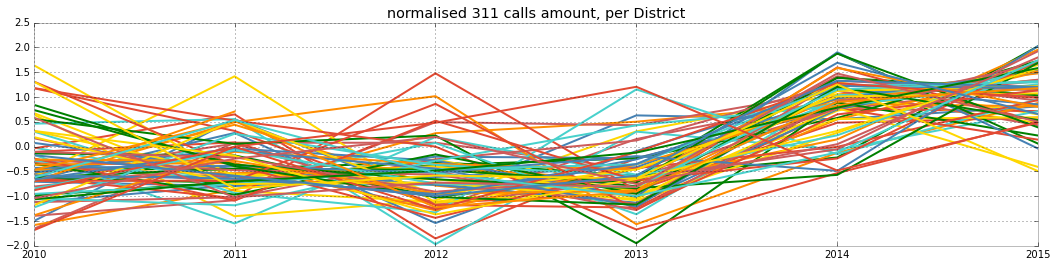

In [10]:
pip_n.T.plot(legend=0, figsize=(18,4), title='normalised pip spatial+amenities score, per District')
calls_n.T.plot(legend=0, figsize=(18,4), title='normalised 311 calls amount, per District')

------------------

## Checking correlation
** actually logically there should be a negative corellation, but...**

In [38]:
corr = calls_n.corrwith(pip_n, axis=1)

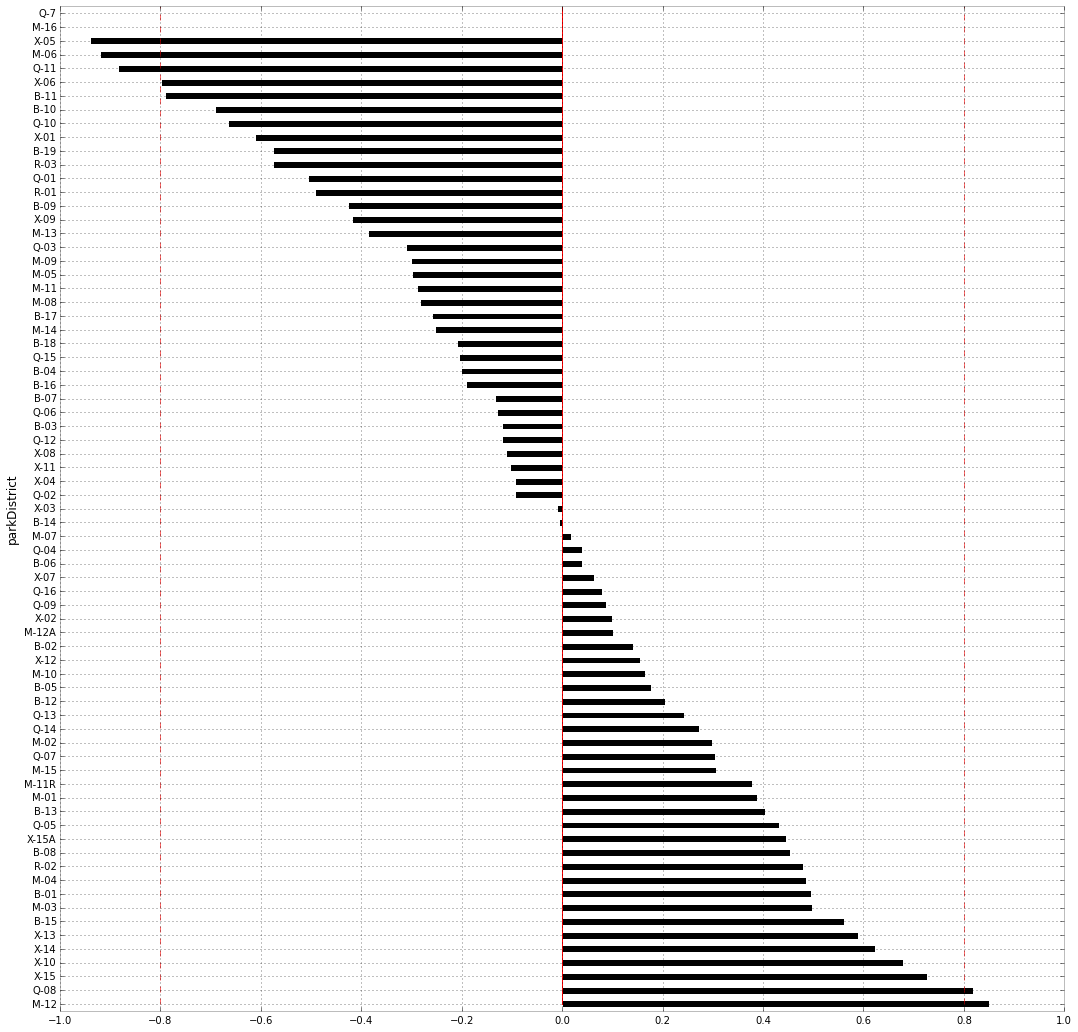

In [74]:
fig, ax = plt.subplots(figsize=(10,10))
corr.sort_values(ascending=0).plot(kind='barh', figsize=(18,18), color='k', xticks=np.arange(-1,1.1,0.2), ax=ax, xlim=(-1,1));

ax.plot([-.8, -.8], [0, 100], color='r', linestyle='--', linewidth=.6,  label='-0.8') ## -.8
ax.plot([.8, .8], [0, 100], color='r', linestyle='--', linewidth=.6,  label='0.8') ## .8
ax.plot([0, 0], [0, 100], color='r', linestyle='-', linewidth=1,  label='0.8'); ## 0

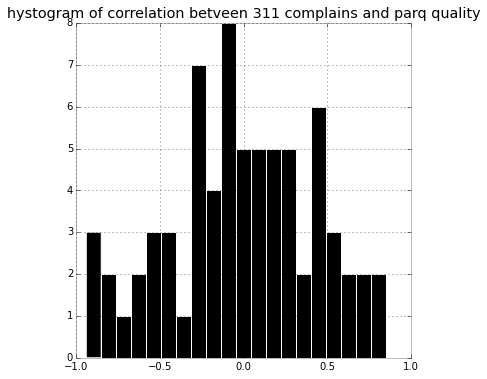

In [48]:
corr.hist(color='k',bins=20, figsize=(6,6))
plt.title('hystogram of correlation betveen 311 complains and parq quality');

### Hight Positive corellation

In [118]:
corr[corr>.8]

parkDistrict
M-12    0.849086
Q-08    0.818821
dtype: float64

### Hight Negative corellation

In [121]:
corr[corr<-.8]

parkDistrict
M-06   -0.920382
Q-11   -0.883573
X-05   -0.941101
dtype: float64

In [126]:
corr.mean()

-0.018497436427292274

In [93]:
# here I tried to see histogram for each borough, but it wasn't that informative

# corrDF = pd.DataFrame(corr).reset_index().rename(columns={0:'Corr'})
# corrDF['Boro'] = corrDF.parkDistrict
# corrDF.Boro = corrDF.Boro.str.split('-').str.get(0)

## Checking correlation versus only Maitenance calls

In [116]:
mcalls = pd.read_csv(PARQA +'/parqa/311/TIMESERIES/311_timeseries_maintenance.csv').set_index('parkDistrict')
mcalls_n = normalise_timeseries(mcalls)

In [122]:
mcorr = mcalls_n.corrwith(pip_n, axis=1)

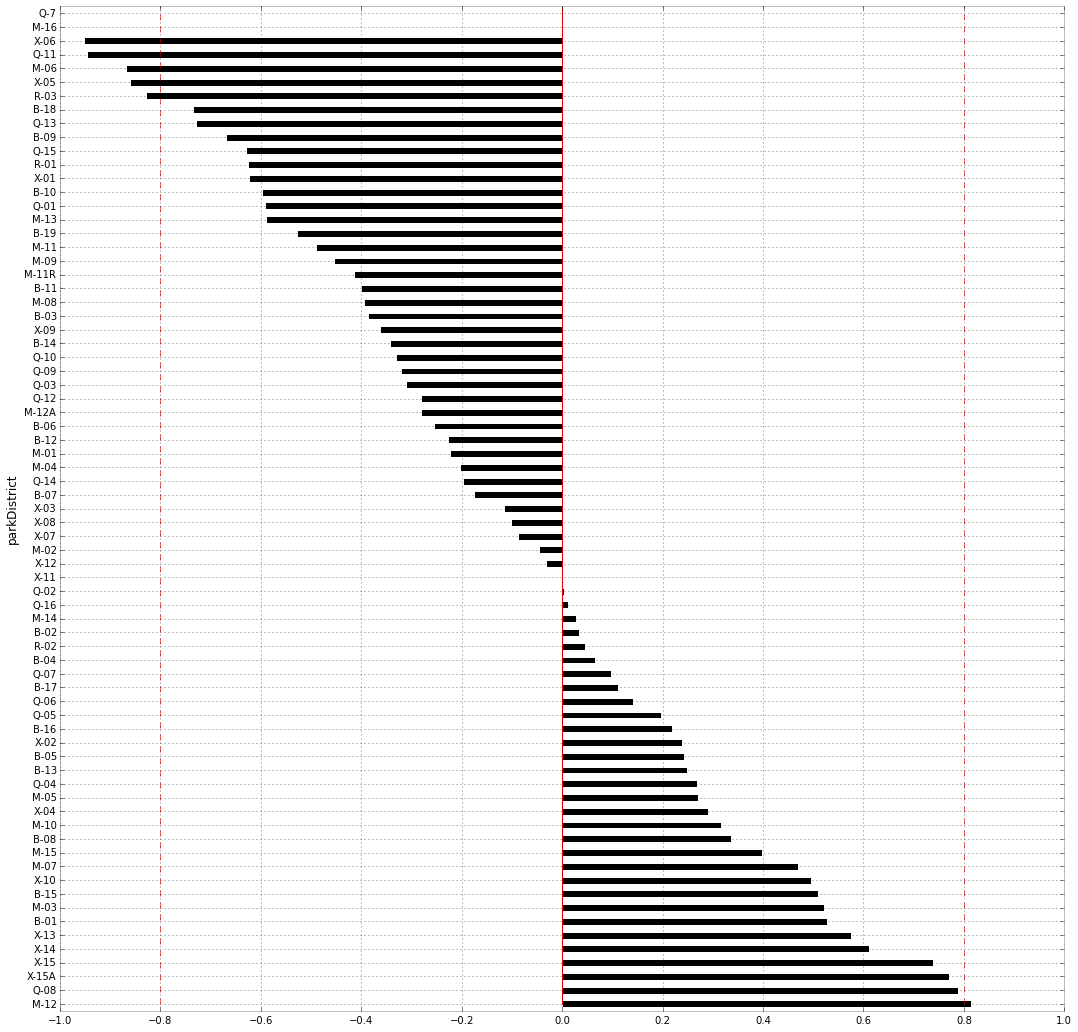

In [123]:
fig, ax = plt.subplots(figsize=(10,10))
mcorr.sort_values(ascending=0).plot(kind='barh', figsize=(18,18), color='k', xticks=np.arange(-1,1.1,0.2), ax=ax, xlim=(-1,1));

ax.plot([-.8, -.8], [0, 100], color='r', linestyle='--', linewidth=.6,  label='-0.8') ## -.8
ax.plot([.8, .8], [0, 100], color='r', linestyle='--', linewidth=.6,  label='0.8') ## .8
ax.plot([0, 0], [0, 100], color='r', linestyle='-', linewidth=1,  label='0.8'); ## 0

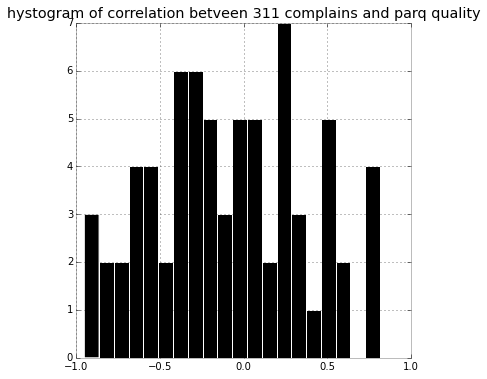

In [125]:
mcorr.hist(color='k',bins=20, figsize=(6,6))
plt.title('hystogram of correlation betveen 311 complains and parq quality');

In [127]:
mcorr.mean()

-0.0961524983937999

## Cheking only related to Park quality scores

In [128]:
pcalls = pd.read_csv(PARQA + '/parqa/311/TIMESERIES/311_timeseries_precize.csv').set_index('parkDistrict')
Pcalls_n = normalise_timeseries(pcalls)


In [129]:
pcorr = mcalls_n.corrwith(pip_n, axis=1)

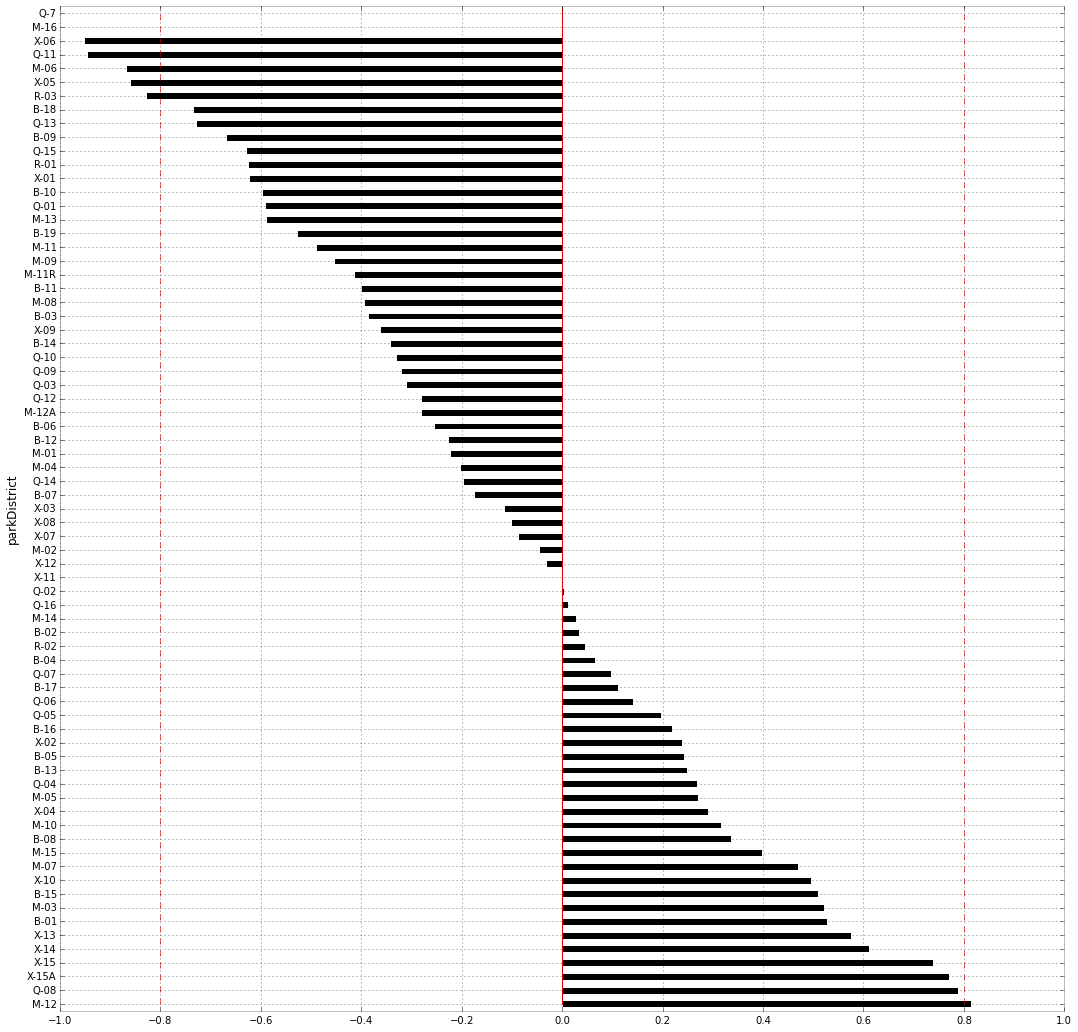

In [130]:
fig, ax = plt.subplots(figsize=(10,10))
pcorr.sort_values(ascending=0).plot(kind='barh', figsize=(18,18), color='k', xticks=np.arange(-1,1.1,0.2), ax=ax, xlim=(-1,1));

ax.plot([-.8, -.8], [0, 100], color='r', linestyle='--', linewidth=.6,  label='-0.8') ## -.8
ax.plot([.8, .8], [0, 100], color='r', linestyle='--', linewidth=.6,  label='0.8') ## .8
ax.plot([0, 0], [0, 100], color='r', linestyle='-', linewidth=1,  label='0.8'); ## 0